## Hypothesis

The average number of bike-trips of a working day in February is higher than the average numbers of bike trips in the weekend

Lets define
WEEKDAY = MONDAY-FRIDAY
WEEKEND = SATURDAY AND SUNDAY
BIKE TRIP = A pick up of a bike
AVERAGE NUMBER OF BIKE-TRIPS = Total number of bike-trips of "n" days divided by "n"

NULL HYPOTHESIS
The average number of bike-trips of a weekday in February is equal or less than the average numbers of 
bike trips in the weekend

Significance level a=0.05

## Importing packages

In [153]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
import zipfile as zp

%pylab inline

import os

Populating the interactive namespace from numpy and matplotlib


## Downloading data

In [133]:
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
                os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [151]:
datestring = '201402'
getCitiBikeCSV(datestring)

file in place, you can continue


## Reading in data and cleaning

In [155]:
data = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')

In [156]:
data['date'] = pd.to_datetime(data['starttime'])

In [157]:
data

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,382,2014-02-01 00:00:00,2014-02-01 00:06:22,294,Washington Square E,40.730494,-73.995721,265,Stanton St & Chrystie St,40.722293,-73.991475,21101,Subscriber,1991,1,2014-02-01 00:00:00
1,372,2014-02-01 00:00:03,2014-02-01 00:06:15,285,Broadway & E 14 St,40.734546,-73.990741,439,E 4 St & 2 Ave,40.726281,-73.989780,15456,Subscriber,1979,2,2014-02-01 00:00:03
2,591,2014-02-01 00:00:09,2014-02-01 00:10:00,247,Perry St & Bleecker St,40.735354,-74.004831,251,Mott St & Prince St,40.723180,-73.994800,16281,Subscriber,1948,2,2014-02-01 00:00:09
3,583,2014-02-01 00:00:32,2014-02-01 00:10:15,357,E 11 St & Broadway,40.732618,-73.991580,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,17400,Subscriber,1981,1,2014-02-01 00:00:32
4,223,2014-02-01 00:00:41,2014-02-01 00:04:24,401,Allen St & Rivington St,40.720196,-73.989978,439,E 4 St & 2 Ave,40.726281,-73.989780,19341,Subscriber,1990,1,2014-02-01 00:00:41
5,541,2014-02-01 00:00:46,2014-02-01 00:09:47,152,Warren St & Church St,40.714740,-74.009106,331,Pike St & Monroe St,40.711731,-73.991930,18674,Subscriber,1990,1,2014-02-01 00:00:46
6,354,2014-02-01 00:01:01,2014-02-01 00:06:55,325,E 19 St & 3 Ave,40.736245,-73.984738,439,E 4 St & 2 Ave,40.726281,-73.989780,16975,Subscriber,1991,1,2014-02-01 00:01:01
7,916,2014-02-01 00:01:11,2014-02-01 00:16:27,354,Emerson Pl & Myrtle Ave,40.693631,-73.962236,395,Bond St & Schermerhorn St,40.688070,-73.984106,16020,Subscriber,1978,1,2014-02-01 00:01:11
8,277,2014-02-01 00:01:33,2014-02-01 00:06:10,375,Mercer St & Bleecker St,40.726795,-73.996951,369,Washington Pl & 6 Ave,40.732241,-74.000264,18891,Subscriber,1944,1,2014-02-01 00:01:33
9,439,2014-02-01 00:02:14,2014-02-01 00:09:33,285,Broadway & E 14 St,40.734546,-73.990741,247,Perry St & Bleecker St,40.735354,-74.004831,20875,Subscriber,1983,2,2014-02-01 00:02:14


In [158]:
data.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender', u'date'],
      dtype='object')

In [159]:
data.drop(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'], axis=1, inplace=True)

In [160]:
data.head()

,date
0,2014-02-01 00:00:00
1,2014-02-01 00:00:03
2,2014-02-01 00:00:09
3,2014-02-01 00:00:32
4,2014-02-01 00:00:41


In [161]:
data['weekday'] = data['date'].apply(lambda x: x.weekday())

In [162]:
data.head()

,date,weekday
0,2014-02-01 00:00:00,5
1,2014-02-01 00:00:03,5
2,2014-02-01 00:00:09,5
3,2014-02-01 00:00:32,5
4,2014-02-01 00:00:41,5


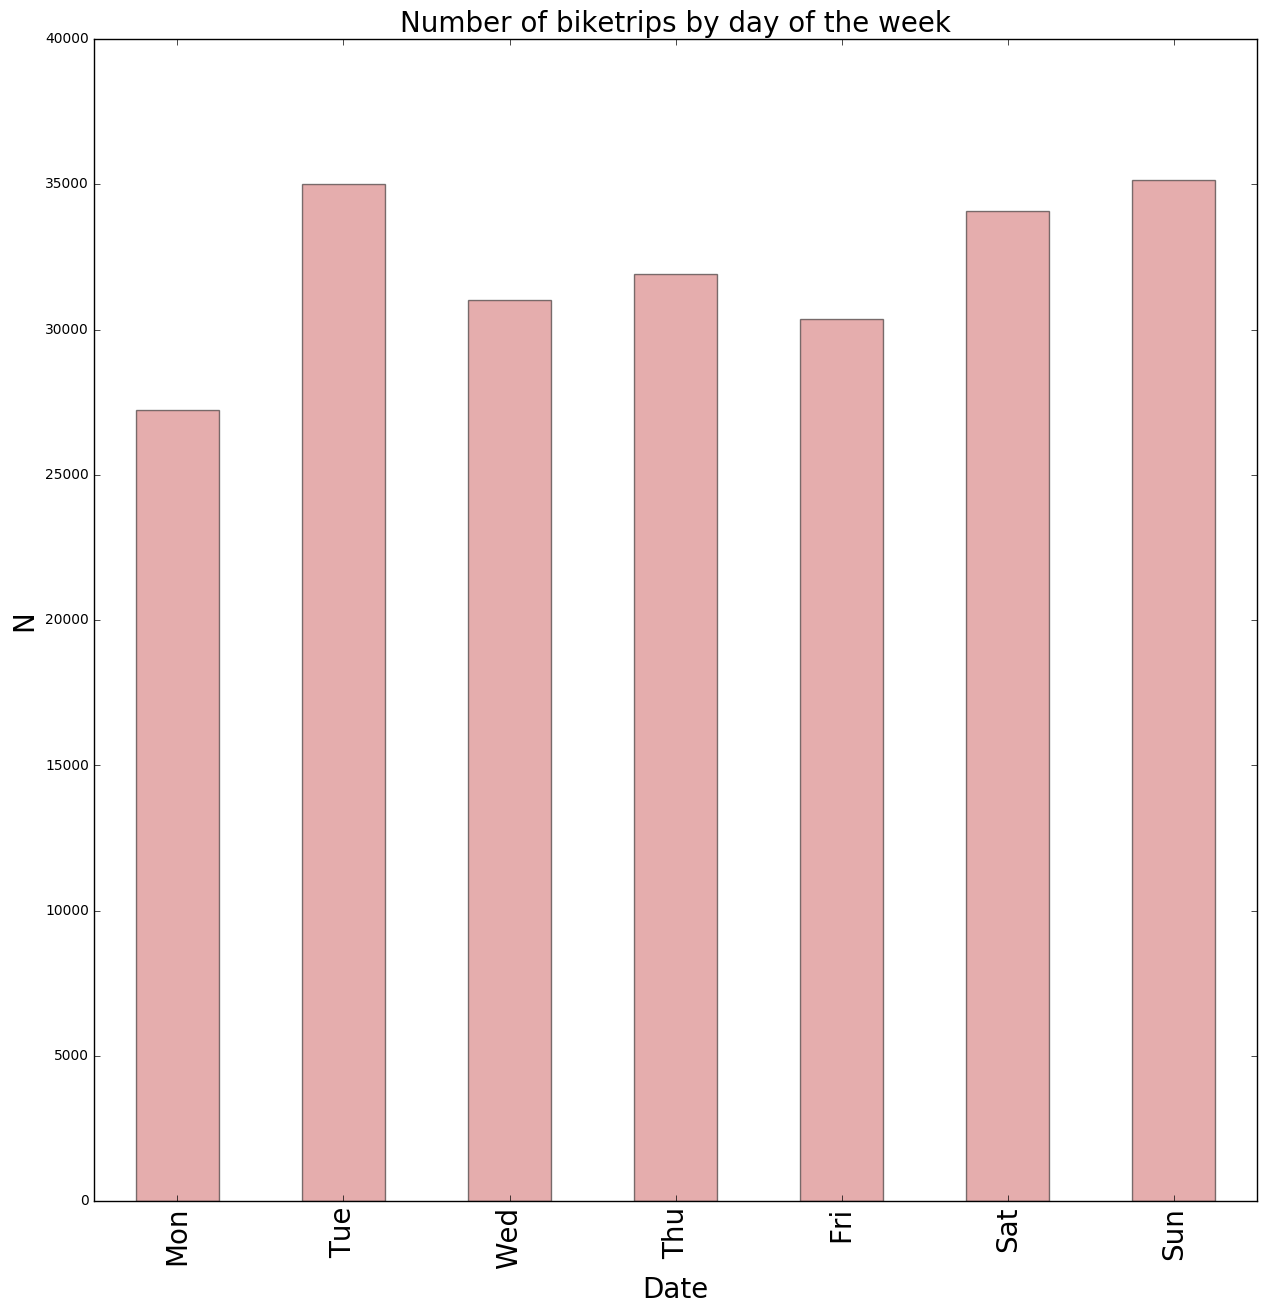

In [163]:
fig=pl.figure(figsize(15,15))

norm_w = 1
ax = ((data['date'].groupby([data['date'].dt.weekday]).count()) / norm_w).plot(kind="bar", color='IndianRed', alpha=0.5)

tmp = ax.xaxis.set_ticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], fontsize=20)
tmp = ax.set_title("Number of biketrips by day of the week", fontsize=20)
tmp = ax.set_ylabel("N", size=20)
tmp = ax.set_xlabel("Date", fontsize=20)

In [164]:
data_count = data.groupby('weekday').size()

In [165]:
data_count

weekday
0    27222
1    35022
2    31020
3    31900
4    30371
5    34062
6    35139
dtype: int64

In [166]:
working_day_trip = 0
weekend_day_trip = 0

for i in range(0 , 4):
    working_day_trip = data_count[i] + working_day_trip

for i in (5,6):
    weekend_day_trip = data_count[i] + weekend_day_trip
    
print ("Total number of weekend trips: %d" %weekend_day_trip)
print ("Total number of weekday trips: %d" %working_day_trip)

Total number of weekend trips: 69201
Total number of weekday trips: 125164


In [167]:
average_weekend_day_trip = weekend_day_trip / 8
average_working_day_trip = working_day_trip / 20

In [168]:
print ("Average number of trips per weekend day: %d" %average_weekend_day_trip)
print ("Average number of trips per weekday: %d" %average_working_day_trip)

Average number of trips per weekend day: 8650
Average number of trips per weekday: 6258


## According to calculated average number of trips by weekdays and weekends
## our hypothesis seems flawed